In [5]:
import tensorflow as tf
import numpy as np

2025-04-20 00:16:04.276444: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Logistic Regression
-

In [14]:
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
x_data = np.array([x_row[0] for x_row in data])
y_data = np.array([y_row[1] for y_row in data])

a = tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))

def hypothesis(a, b):
    return 1 / (1 + np.e**-(a * x_data + b))

def cost(a, b):
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(a, b)) + (1- y_data) * tf.math.log(1 - hypothesis(a, b)))

opt = tf.keras.optimizers.SGD(learning_rate = 0.5)

epoch = 60001
for i in range(epoch):
    with tf.GradientTape() as tape:
        current_cost = cost(a, b)
    grads = tape.gradient(current_cost, [a, b])
    opt.apply_gradients(zip(grads, [a, b]))
    if i % 6000 == 0:
        print(f'Epoch: {i}, loss = {current_cost.numpy()}, slope a = {a.numpy()}, y-intercept = {b.numpy()}')
print(f'Final Result - a: {a.numpy()}, b: {b.numpy()}')

Epoch: 0, loss = 4.194209454368379, slope a = [2.46651392], y-intercept = [-0.1080918]
Epoch: 6000, loss = 0.015174866836427143, slope a = [2.92244193], y-intercept = [-20.30765867]
Epoch: 12000, loss = 0.008064695296503489, slope a = [3.56446602], y-intercept = [-24.80609245]
Epoch: 18000, loss = 0.00547237371355404, slope a = [3.95621748], y-intercept = [-27.54978227]
Epoch: 24000, loss = 0.004135671281083597, slope a = [4.23839768], y-intercept = [-29.52575612]
Epoch: 30000, loss = 0.0033216624684337614, slope a = [4.4588944], y-intercept = [-31.06965894]
Epoch: 36000, loss = 0.0027744114750809378, slope a = [4.63981315], y-intercept = [-32.33637303]
Epoch: 42000, loss = 0.0023814633773079517, slope a = [4.79318182], y-intercept = [-33.41015524]
Epoch: 48000, loss = 0.002085721819254376, slope a = [4.92627016], y-intercept = [-34.34192434]
Epoch: 54000, loss = 0.0018551398735368544, slope a = [5.0438072], y-intercept = [-35.16480055]
Epoch: 60000, loss = 0.0016703496445812662, slope

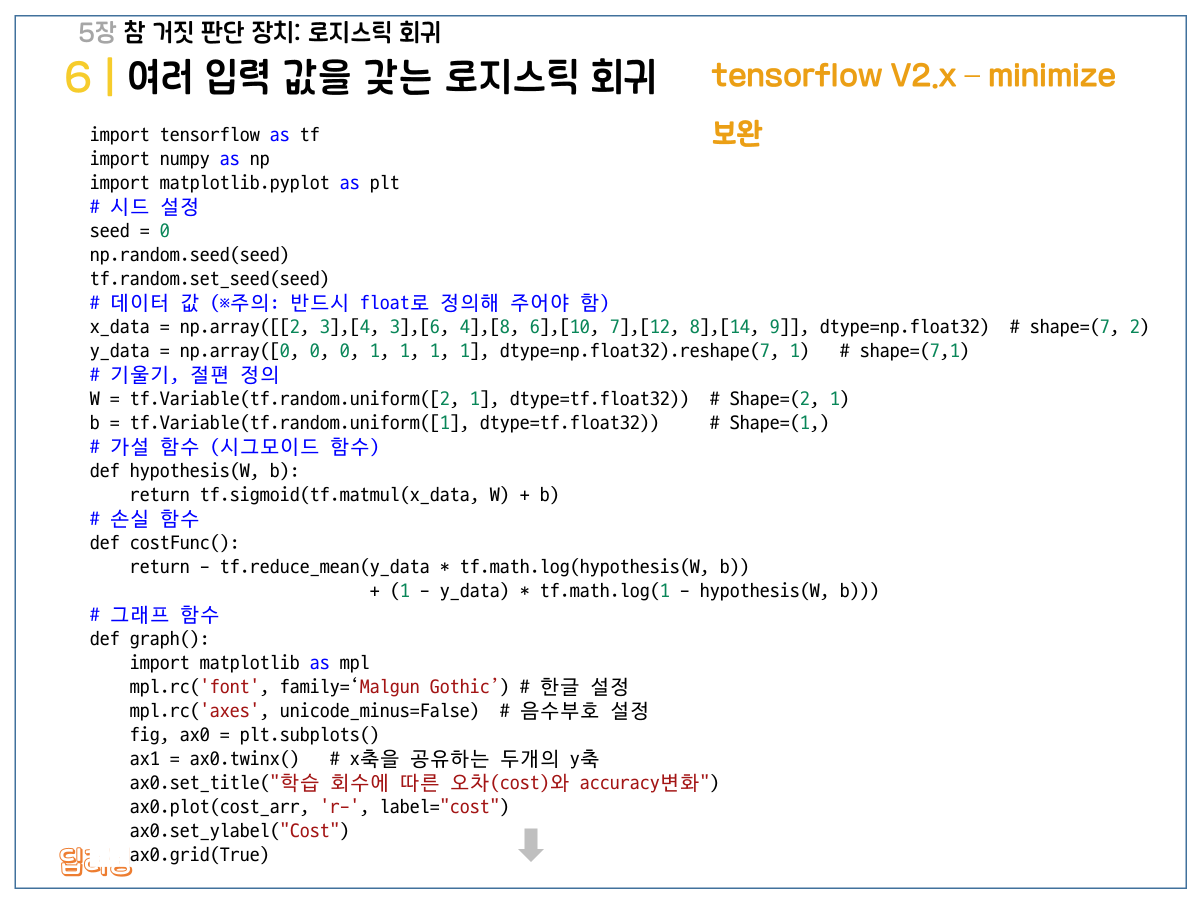

epochs=0, cost = 1.07955002784729, w1 = 0.13703562319278717, w2 = 0.07879504561424255, b = [0.5169016]
epochs=200, cost = 0.31833288073539734, w1 = 0.7767335176467896, w2 = -0.6357904672622681, b = [-1.6716968]
epochs=400, cost = 0.2398236095905304, w1 = 0.8634782433509827, w2 = -0.5346623659133911, b = [-2.9066737]
epochs=600, cost = 0.19474677741527557, w1 = 0.839161217212677, w2 = -0.32884255051612854, b = [-3.8300543]
epochs=800, cost = 0.16400794684886932, w1 = 0.7806609272956848, w2 = -0.1056576818227768, b = [-4.5777955]
epochs=1000, cost = 0.14144380390644073, w1 = 0.7115950584411621, w2 = 0.1113760694861412, b = [-5.2087655]
epochs=1200, cost = 0.12414483726024628, w1 = 0.6411640644073486, w2 = 0.3148951530456543, b = [-5.7554083]
epochs=1400, cost = 0.11047596484422684, w1 = 0.5732272267341614, w2 = 0.5030398964881897, b = [-6.237951]
epochs=1600, cost = 0.09942362457513809, w1 = 0.5093492269515991, w2 = 0.6760544180870056, b = [-6.670009]
epochs=1800, cost = 0.09031902998685

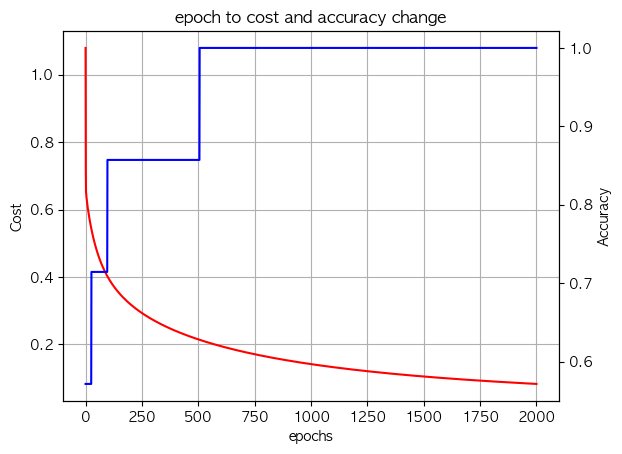

In [16]:
import tensorflow as tf
import numpy as tnp
import matplotlib.pyplot as plt

#시드 설정
seed = 0 
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 값
x_data = np.array([[2, 3], [4, 3], [6, 4], [8, 6], [10, 7], [12, 8], [14, 9]], dtype=np.float32)
y_data = np.array([0, 0, 0, 1, 1, 1, 1], dtype=np.float32).reshape(7, 1)
#기울기
w = tf.Variable(tf.random.uniform([2, 1], dtype=tf.float32))
b = tf.Variable(tf.random.uniform([1], dtype=tf.float32))

#시그모이드
def hypothesis(w, b):
    return tf.sigmoid(tf.matmul(x_data, w) + b)

def cost():
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(w, b)) + (1-y_data)*tf.math.log(1-hypothesis(w, b)))

def graph():
    import matplotlib as mpl
    mpl.rc('font', family='AppleGothic')
    mpl.rc('axes', unicode_minus=False)
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("epoch to cost and accuracy change")
    ax0.plot(cost_arr, 'r-', label="cost")
    ax0.set_ylabel("Cost")
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
epoch_arr = []
cost_arr = []
accuracy_arr = []

for i in range(2001):
    with tf.GradientTape() as tape:
        current_cost = cost()
    grads = tape.gradient(current_cost, [w, b])
    opt.apply_gradients(zip(grads, [w, b]))
    if i % 200 == 0:
        print(f'epochs={i}, cost = {current_cost.numpy()}, w1 = {w.numpy()[0, 0]}, w2 = {w.numpy()[1, 0]}, b = {b.numpy()}')

    predicted = tf.cast(hypothesis(w, b) > 0.5, dtype=tf.float32)
    epoch_arr.append(i)
    cost_arr.append(current_cost.numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)
graph()

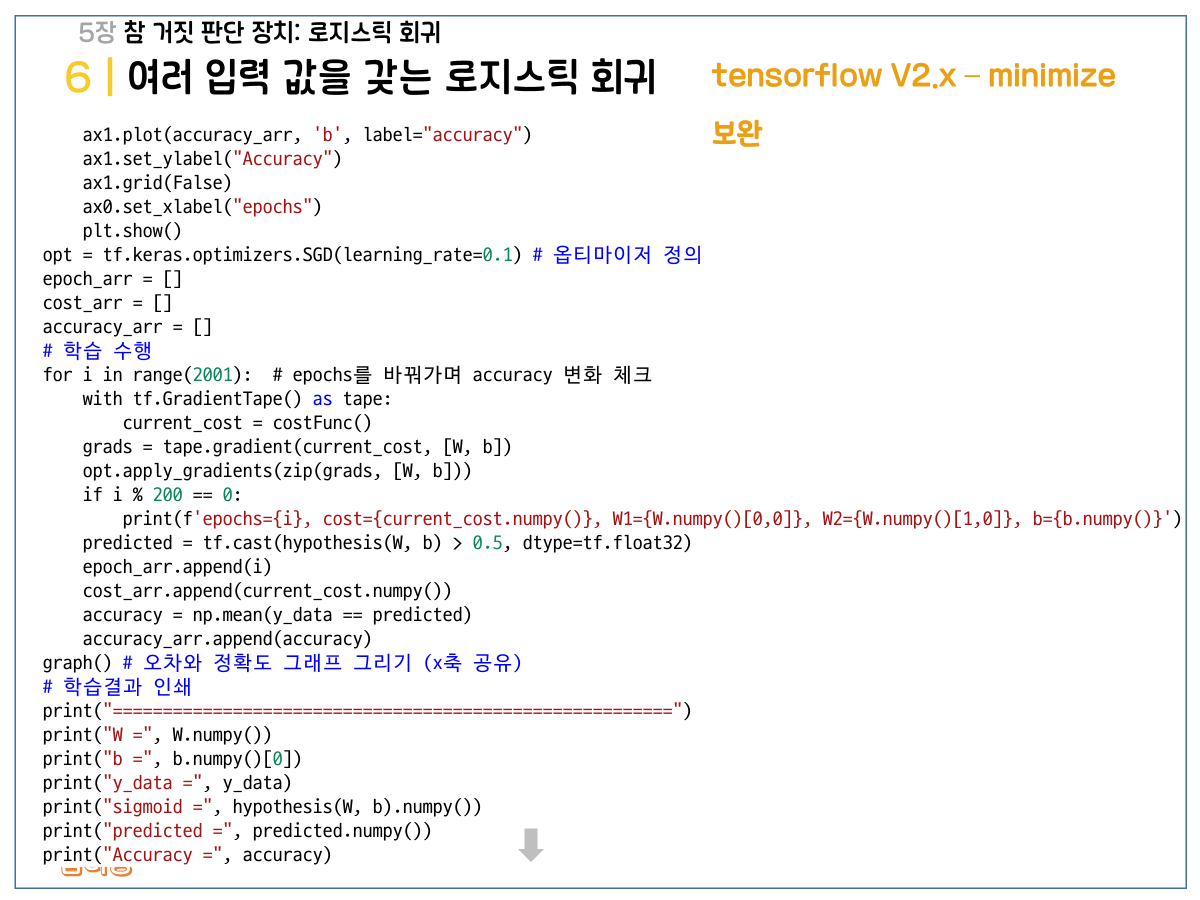

In [ ]:
print("================================")
print("W = ", w.numpy())
print("b = ", b.numpy()[0])
print("y data = ", y_data)
print("sigmoid = ", hypothesis(w, b).numpy())
print("predicted = ", predicted.numpy())
print("accuracy = ", accuracy)